In [8]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation ="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [9]:
# モデルのコンパイル
from keras import optimizers

model.compile(loss = "binary_crossentropy", 
                optimizer=optimizers.RMSprop(), metrics=["acc"])


In [13]:
# augumentationを用いてデータの水増し
from keras.preprocessing.image import ImageDataGenerator
import os

base_dir = "./Keras/data/cats_and_dogs_small"

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range = 40, 
    width_shift_range = 0.2,    # 画像を水平に移動させる範囲（幅全体の割合)
    shear_range = 0.2,          # 透析変形をランダムに適用
    zoom_range = 0.2,           # 図形の内側をランダムにズーム
    horizontal_flip = True,     # 新たに作成されたピクセルを埋めるための戦略   
)

# 検証データは水増ししてはいけないよ
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(
    train_dir, target_size = (150, 150), 
    batch_size = 32, 
    class_mode = "binary"
)

val_data = test_datagen.flow_from_directory(
    val_dir, 
    target_size = (150, 150), 
    batch_size = 32,
    class_mode = "binary" 
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


- モデルの学習

In [14]:
history = model.fit_generator(
    train_data, 
    steps_per_epoch = 100, 
    epochs = 100, 
    validation_data = val_data, 
    validation_steps = 50
)

# save training model
model.save("cnn_2.h5")

Epoch 1/100
100/100 [==============================] - 19s 191ms/step - loss: 0.7711 - acc: 0.5103 - val_loss: 0.6905 - val_acc: 0.5305
Epoch 2/100
100/100 [==============================] - 16s 158ms/step - loss: 0.7061 - acc: 0.5291 - val_loss: 0.6747 - val_acc: 0.5825
Epoch 3/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6795 - acc: 0.5928 - val_loss: 0.6538 - val_acc: 0.5812
Epoch 4/100
100/100 [==============================] - 16s 163ms/step - loss: 0.6418 - acc: 0.6425 - val_loss: 0.6530 - val_acc: 0.6147
Epoch 5/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6372 - acc: 0.6572 - val_loss: 0.6110 - val_acc: 0.6637
Epoch 6/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6048 - acc: 0.6716 - val_loss: 0.8759 - val_acc: 0.6231
Epoch 7/100
100/100 [==============================] - 16s 157ms/step - loss: 0.5972 - acc: 0.6956 - val_loss: 0.6017 - val_acc: 0.6675
Epoch 8/100
100/100 [===========================

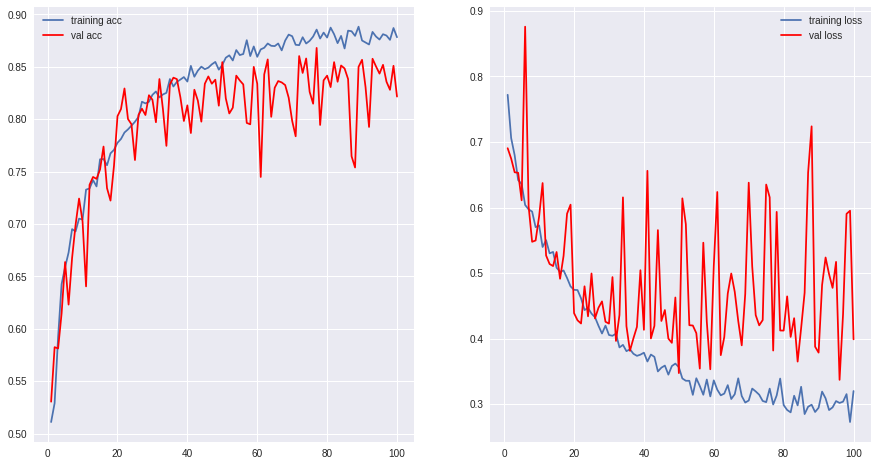

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
%matplotlib inline

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

# plot the accuracy curve

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "-", label = "training acc")
plt.plot(epochs, val_acc, "r-", label = "val acc")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "-", label = "training loss")
plt.plot(epochs, val_loss, "r-", label = "val loss")
plt.legend()

plt.show()

- DropoutやData augumentationを行うと85%ぐらいまで正答率が伸びる